In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sqlalchemy as sa
from tabulate import tabulate
import seaborn as sns
%matplotlib inline

In [2]:
import urllib.request

In [3]:
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')
result = urllib.request.urlopen(request)
resulttext = result.read()

In [4]:
from bs4 import BeautifulSoup as BS

In [5]:
soup=BS(resulttext,'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of deadly earthquakes since 1900 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needi

In [6]:
table=soup.find_all(class_='wikitable')[0]

In [7]:
df = pd.read_html(str(table),header=0)[0]


In [8]:

df

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [9]:
df.info()
df.to_csv("earth_quake.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null float64
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: 

In [10]:
#df.replace(" ","NaN")

In [11]:
pattern=r'\(.*\)|\[.*\]|\D'
#pattern1= r'\(.*\)|\[.*\]|\D'
df['Other Source Deaths']=df['Other Source Deaths'].str.replace(pattern,"")


In [12]:
df['Other Source Deaths'].loc[1300:]


1300       NaN
1301       NaN
1302       NaN
1303       NaN
1304       NaN
1305       NaN
1306       NaN
1307       NaN
1308       NaN
1309       NaN
1310       NaN
1311       NaN
1312       NaN
1313       NaN
1314       NaN
1315       NaN
1316       NaN
1317        41
1318        60
1319       NaN
1320       215
1321        34
1322       295
1323       NaN
1324         1
1325        79
1326       189
1327      1115
1328    222517
1329       521
1330        42
1331         1
1332      2698
1333       181
1334       NaN
1335     15894
1336       150
1337       NaN
1338       111
1339       601
Name: Other Source Deaths, dtype: object

In [13]:
df['EM-DAT Total Deaths'] = df['EM-DAT Total Deaths'].str.replace(pattern, "")

In [14]:
pattern = r'[^\.\d].*'

In [15]:
list(df['Magnitude'].unique())

['7.0 MJMA',
 '5.9 Muk',
 '7.7 Mw',
 '6.5 Ms',
 '6.4 Muk',
 '7.2 Mw',
 '6.8 Ms',
 '6.9 Ms',
 '6.9 Muk',
 '5.5 Muk',
 '7.5 Mw',
 '6.7 Ms',
 '6.0 ML',
 '5.7 Muk',
 '7.0 Ms',
 '5.8 Muk',
 '8.3 Muk',
 '6.5 Muk',
 '6.0 Muk',
 '6.2 Muk',
 '6.3 Muk',
 '7.8 Mw',
 '6.6 Muk',
 '7.0 mb',
 '8.8 Muk',
 '7.1 MJMA',
 '7.8 Muk',
 '8.2 Muk',
 '7.9 Mw',
 '7.1 Mw',
 '7.2 Ms',
 '7.3 Muk',
 '6.8 Muk',
 '7.1 mb',
 '6.2 Ms',
 '7.5 mb',
 '6.9 mb',
 '7.6 mb',
 '6.7 Muk',
 '7.6 Mw',
 '8.1 mb',
 '4.9 Muk',
 '7.2 mb',
 '7.4 mb',
 '7.2 MJMA',
 '7.3 Mw',
 '7.1 Ms',
 '8.2 Mw',
 '8.6 Ms',
 nan,
 '6.8 MJMA',
 '6.9 MJMA',
 '8.7 Mw',
 '6.5 MJMA',
 '8.5 Mw',
 '7.9 Muk',
 '5.3 Muk',
 '7.3 MJMA',
 '8.3',
 '7.7 mb',
 '7.6 Ms',
 '5.0 Muk',
 '7.9 Ms',
 '5.4 Muk',
 '6.9 Mw',
 '7.0 Muk',
 '5.6 Muk',
 '6.1 Muk',
 '8.1 Mw',
 '8.4 Muk',
 '6.4 Mw',
 '8.1 Muk',
 '7.4 Mw',
 '7.8 Ms',
 '7.3 mb',
 '7.0 Mw',
 '4.8 Muk',
 '8.0 Mw',
 '7.3 Ms',
 '6.8 Mw',
 '6.6 Ms',
 '8.6 Muk',
 '9.0 Muk',
 '5.7 Mw',
 '9.5 Muk',
 '6.1 Mw',
 '5.5 mb',
 '6.4

In [16]:
df['Magnitude'] = df['Magnitude'].str.replace(pattern,'')

In [17]:
df.tail(n=15)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1325,2009-09-02 07:55,Indonesia (see 2009 West Java earthquake),NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,79
1326,2009-09-29 17:48,Samoa (see 2009 Samoa earthquake and tsunami),NaN,NaN,8.1,8.1,NaN,NaN,NaN,NaN,NaN,189
1327,2009-09-30 10:16,Indonesia (see 2009 Padang earthquake),NaN,NaN,NaN,7.6,NaN,NaN,NaN,NaN,NaN,1115
1328,2010-01-12 17:00,Haiti (see 2010 Haiti earthquake),18.457,-72.533,13,7.0,NaN,NaN,NaN,NaN,NaN,222517
1329,2010-02-27 06:34,Chile (see 2010 Chile earthquake),-35.846,-72.719,35,8.8,T,NaN,NaN,NaN,NaN,521
1330,2010-03-08 02:32,Turkey (see 2010 Elâzığ earthquake),NaN,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,42
1331,2010-03-11 14:39,Chile (see 2010 Pichilemu earthquake),NaN,NaN,NaN,6.9,L,NaN,NaN,NaN,NaN,1
1332,2010-04-14 23:49,China (see 2010 Yushu earthquake),NaN,NaN,NaN,6.9,L,NaN,NaN,NaN,NaN,2698
1333,2011-02-21 23:51,New Zealand (see 2011 Christchurch earthquake),NaN,NaN,NaN,6.3,Lq,NaN,NaN,NaN,NaN,181
1334,2011-03-10 04:58,China (see 2011 Yunnan earthquake),NaN,NaN,NaN,5.4,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# converting magnitude column to a numeric float column
df['Magnitude'] = pd.to_numeric(df['Magnitude'])

In [19]:
df.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null float64
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null float64
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes:

In [21]:
#converting other source deaths columns & EM-DAT total deaths to numeric columns
df['EM-DAT Total Deaths']=pd.to_numeric(df['EM-DAT Total Deaths'])
df['Other Source Deaths']=pd.to_numeric(df['Other Source Deaths'])

In [22]:
df.head(n=5)


,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN


In [23]:
df.rename(columns={'Present-day country and link to Wikipedia article':'Country'}, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)           1340 non-null object
Country                1340 non-null object
Lat                    1326 non-null object
Long                   1326 non-null object
Depth (km)             1250 non-null object
Magnitude              1339 non-null float64
Secondary Effects      373 non-null object
PDE Shaking Deaths     739 non-null float64
PDE Total Deaths       750 non-null float64
Utsu Total Deaths      1027 non-null float64
EM-DAT Total Deaths    560 non-null float64
Other Source Deaths    37 non-null float64
dtypes: float64(6), object(6)
memory usage: 125.7+ KB


In [25]:
df


,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN


In [26]:
#gives the max of the a & b and result is stored in a new column c
#df["C"] = df[["A", "B"]].max(axis=1) 

In [27]:
df["deaths"] = df[["PDE Total Deaths","Utsu Total Deaths","EM-DAT Total Deaths","Other Source Deaths"]].max(axis=1)

In [28]:
df.head(n=100)


,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [29]:
year_of_quake = list(df['Origin (UTC)'].astype('str'))
year=[]

In [30]:
for date in year_of_quake:
    year.append(date[0:4])    
df['year']=year
df.head()

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths,year
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,1900
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1901


In [31]:
country_pattern = r'(, ?| ?\().*'
df['Country'] = df['Country'].str.replace(country_pattern, "")

In [32]:
df['Magnitude'].max()

9.5

In [33]:
#retreive a row value where the magnitude is max - 9.5 in our case
df.loc[df['Magnitude'].idxmax()]

Origin (UTC)           1960-05-22 19:11
Country                           Chile
Lat                             -38.235
Long                            -73.047
Depth (km)                           35
Magnitude                           9.5
Secondary Effects                     T
PDE Shaking Deaths                  NaN
PDE Total Deaths                    NaN
Utsu Total Deaths                  5700
EM-DAT Total Deaths                6000
Other Source Deaths                 NaN
deaths                             6000
year                               1960
Name: 396, dtype: object

In [34]:
#retrieve the row details where the deaths are max -- 
df.loc[df['deaths'].idxmax()]

Origin (UTC)           1976-07-27 19:42
Country                           China
Lat                              39.605
Long                            117.888
Depth (km)                         16.7
Magnitude                           7.6
Secondary Effects                   NaN
PDE Shaking Deaths               655237
PDE Total Deaths                 655237
Utsu Total Deaths                242800
EM-DAT Total Deaths              242000
Other Source Deaths                 NaN
deaths                           655237
year                               1976
Name: 583, dtype: object

In [35]:
df.loc[df['Magnitude'].idxmin()]

Origin (UTC)           1986-03-12 16:32
Country                   United States
Lat                              47.470
Long                           -115.800
Depth (km)                            1
Magnitude                             2
Secondary Effects                   NaN
PDE Shaking Deaths                    0
PDE Total Deaths                      1
Utsu Total Deaths                     1
EM-DAT Total Deaths                 NaN
Other Source Deaths                 NaN
deaths                                1
year                               1986
Name: 774, dtype: object

In [36]:
df.loc[df['deaths'].idxmin()]

Origin (UTC)           1966-03-07 21:29
Country                           China
Lat                              37.388
Long                            114.963
Depth (km)                          7.7
Magnitude                           6.6
Secondary Effects                   NaN
PDE Shaking Deaths                  NaN
PDE Total Deaths                    NaN
Utsu Total Deaths                   NaN
EM-DAT Total Deaths                   0
Other Source Deaths                 NaN
deaths                                0
year                               1966
Name: 435, dtype: object

In [37]:
df.loc[df['Magnitude'] >= 9.0]

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths,year
332,1952-11-04 16:58,Russian Federation,52.755,160.057,22.2,9.0,T,NaN,NaN,NaN,NaN,NaN,NaN,1952
396,1960-05-22 19:11,Chile,-38.235,-73.047,35,9.5,T,NaN,NaN,5700.0,6000.0,NaN,6000.0,1960
416,1964-03-28 03:36,United States,61.017,-147.648,6.6,9.2,T,NaN,NaN,131.0,131.0,NaN,131.0,1964
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30,9.1,"T,L",NaN,297200.0,NaN,NaN,231000.0,297200.0,2004
1335,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0,T,NaN,NaN,NaN,NaN,15894.0,15894.0,2011


In [38]:
df['deaths'].nlargest(5)

583     655237.0
1238    297200.0
102     235502.0
1328    222517.0
140     200000.0
Name: deaths, dtype: float64

In [39]:
df['Magnitude'].nlargest(5)

396     9.5
416     9.2
1238    9.1
332     9.0
1335    9.0
Name: Magnitude, dtype: float64

In [40]:
df.deaths.nlargest(5)

583     655237.0
1238    297200.0
102     235502.0
1328    222517.0
140     200000.0
Name: deaths, dtype: float64

In [41]:
df_max_deaths = df.loc[df['deaths'].isin([655237.0,297200.0,235502.0,222517.0,200000.0])]

In [42]:
print(df_max_deaths)

          Origin (UTC)    Country     Lat     Long Depth (km)  Magnitude  \
102   1920-12-16 12:05      China  36.601  105.317         25        8.6   
140   1927-05-22 22:32      China  37.386  102.311         25        7.9   
583   1976-07-27 19:42      China  39.605  117.888       16.7        7.6   
1238  2004-12-26 00:58  Indonesia   3.287   95.972         30        9.1   
1328  2010-01-12 17:00      Haiti  18.457  -72.533         13        7.0   

     Secondary Effects  PDE Shaking Deaths  PDE Total Deaths  \
102                NaN                 NaN               NaN   
140                NaN                 NaN               NaN   
583                NaN            655237.0          655237.0   
1238               T,L                 NaN          297200.0   
1328               NaN                 NaN               NaN   

      Utsu Total Deaths  EM-DAT Total Deaths  Other Source Deaths    deaths  \
102            235502.0             180000.0                  NaN  235502.0   


In [43]:
df_max_magnitude=df.loc[df['Magnitude'].isin([9.0,9.1,9.2,9.5])]

In [44]:
print(df_max_magnitude[['Origin (UTC)','Country','Magnitude','deaths','year']])

          Origin (UTC)             Country  Magnitude    deaths  year
332   1952-11-04 16:58  Russian Federation        9.0       NaN  1952
396   1960-05-22 19:11               Chile        9.5    6000.0  1960
416   1964-03-28 03:36       United States        9.2     131.0  1964
1238  2004-12-26 00:58           Indonesia        9.1  297200.0  2004
1335  2011-03-11 14:46               Japan        9.0   15894.0  2011


In [45]:
print(df_max_deaths[['Origin (UTC)','Country','Magnitude','deaths','year']])

          Origin (UTC)    Country  Magnitude    deaths  year
102   1920-12-16 12:05      China        8.6  235502.0  1920
140   1927-05-22 22:32      China        7.9  200000.0  1927
583   1976-07-27 19:42      China        7.6  655237.0  1976
1238  2004-12-26 00:58  Indonesia        9.1  297200.0  2004
1328  2010-01-12 17:00      Haiti        7.0  222517.0  2010


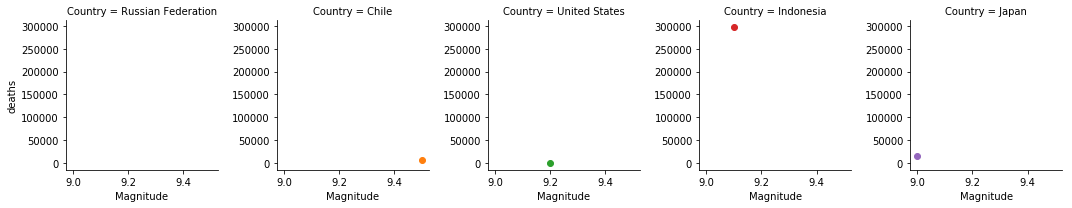

In [46]:
map_max_magnitude = sns.FacetGrid(df_max_magnitude,col="Country",hue="year")
map_max_magnitude.map(plt.plot,"Magnitude","deaths",marker="o");
#plt.show()

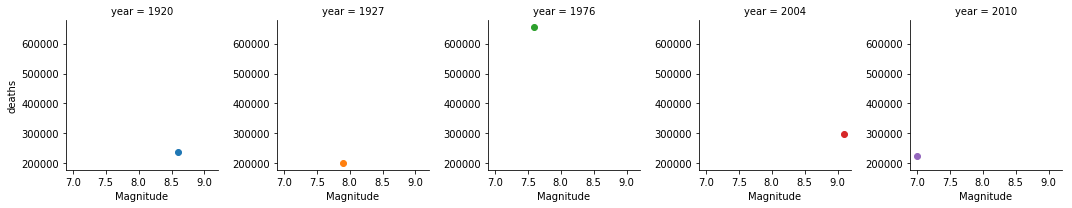

In [47]:
map_max_deaths = sns.FacetGrid(df_max_deaths,col="year",hue="year")
map_max_deaths.map(plt.plot,"Magnitude","deaths",marker="o")
plt.show()

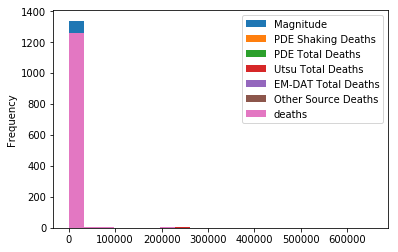

In [48]:
df.plot.hist(bins=20)

In [49]:
lat_long_pattern = r'\?'

In [50]:
# removing the ? from lat,long and depths column , replacing with nan value
df['Lat'] = df['Lat'].replace(lat_long_pattern,np.nan,regex=True)
df['Long']= df['Long'].replace(lat_long_pattern,np.nan,regex=True)
df['Depth (km)']= df['Depth (km)'].replace(lat_long_pattern,np.nan,regex=True)

In [51]:
print(df['Depth (km)'].loc[400:])

400      23.9
401        35
402        35
403     162.9
404      32.6
405        35
406        35
407       150
408     107.7
409      17.6
410        35
411        35
412      65.3
413       NaN
414        60
415        21
416       6.6
417     129.2
418      31.6
419      10.4
420      13.1
421      92.7
422        31
423      28.4
424      38.5
425       4.7
426      69.9
427      50.3
428      38.7
429      65.4
        ...  
1310       18
1311        4
1312       16
1313        7
1314       10
1315       68
1316      NaN
1317       10
1318     27.6
1319      NaN
1320      NaN
1321       48
1322      8.8
1323      NaN
1324      NaN
1325      NaN
1326      8.1
1327      NaN
1328       13
1329       35
1330      NaN
1331      NaN
1332      NaN
1333      NaN
1334      NaN
1335     24.4
1336      NaN
1337     66.0
1338     19.7
1339      7.2
Name: Depth (km), Length: 940, dtype: object


In [52]:
df['Lat']=pd.to_numeric(df['Lat'])
df['Long']=pd.to_numeric(df['Long'])
df['Depth (km)']=pd.to_numeric(df['Depth (km)'])
df['year'] = pd.to_numeric(df['year'])


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
Origin (UTC)           1340 non-null object
Country                1340 non-null object
Lat                    1325 non-null float64
Long                   1325 non-null float64
Depth (km)             1249 non-null float64
Magnitude              1339 non-null float64
Secondary Effects      373 non-null object
PDE Shaking Deaths     739 non-null float64
PDE Total Deaths       750 non-null float64
Utsu Total Deaths      1027 non-null float64
EM-DAT Total Deaths    560 non-null float64
Other Source Deaths    37 non-null float64
deaths                 1274 non-null float64
year                   1340 non-null int64
dtypes: float64(10), int64(1), object(3)
memory usage: 146.6+ KB


In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point
%matplotlib inline
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [55]:
world.crs

{'init': 'epsg:4326'}

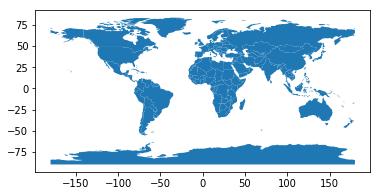

In [56]:
ax = world.plot()

In [57]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [58]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
pop_est       177 non-null float64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null object
dtypes: float64(2), object(4)
memory usage: 8.4+ KB


In [59]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [60]:
#converting df into geodf ,initialize crs, & convert lat lon columns into geometry points
crs = {'init': 'epsg:4326'}
geometry_pts = [Point(xy) for xy in zip(df.Long,df.Lat)]
gdf = GeoDataFrame(df, crs=crs, geometry=geometry_pts)
print(gdf.head(n=5))


       Origin (UTC)    Country   Lat   Long  Depth (km)  Magnitude  \
0  1900-05-11 17:23      Japan  38.7  141.1         5.0        7.0   
1  1900-07-12 06:25     Turkey  40.3   43.1         NaN        5.9   
2  1900-10-29 09:11  Venezuela  11.0  -66.0         0.0        7.7   
3  1901-02-15 00:00      China  26.0  100.1         0.0        6.5   
4  1901-03-31 07:11   Bulgaria  43.4   28.7         NaN        6.4   

  Secondary Effects  PDE Shaking Deaths  PDE Total Deaths  Utsu Total Deaths  \
0               NaN                 NaN               NaN                NaN   
1               NaN                 NaN               NaN              140.0   
2               NaN                 NaN               NaN                NaN   
3               NaN                 NaN               NaN                NaN   
4               NaN                 NaN               NaN                4.0   

   EM-DAT Total Deaths  Other Source Deaths  deaths  year            geometry  
0                 

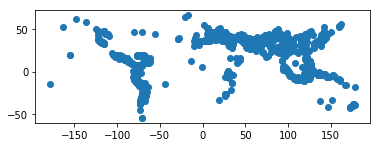

In [61]:
gdf.plot();

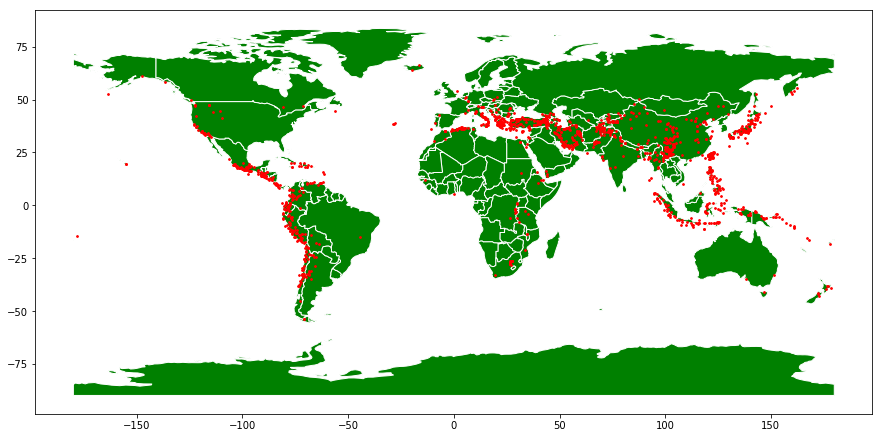

In [62]:
#plotting the base world map and drafting the df points on the base map 
ax = world.plot(color='green', edgecolor='white', figsize=(15,85))
#.axis('off')
gdf.plot(ax=ax, marker='.', color='red', markersize=12);


In [63]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import os
from mpl_toolkits.basemap import Basemap


C:\Users\Suhasini\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


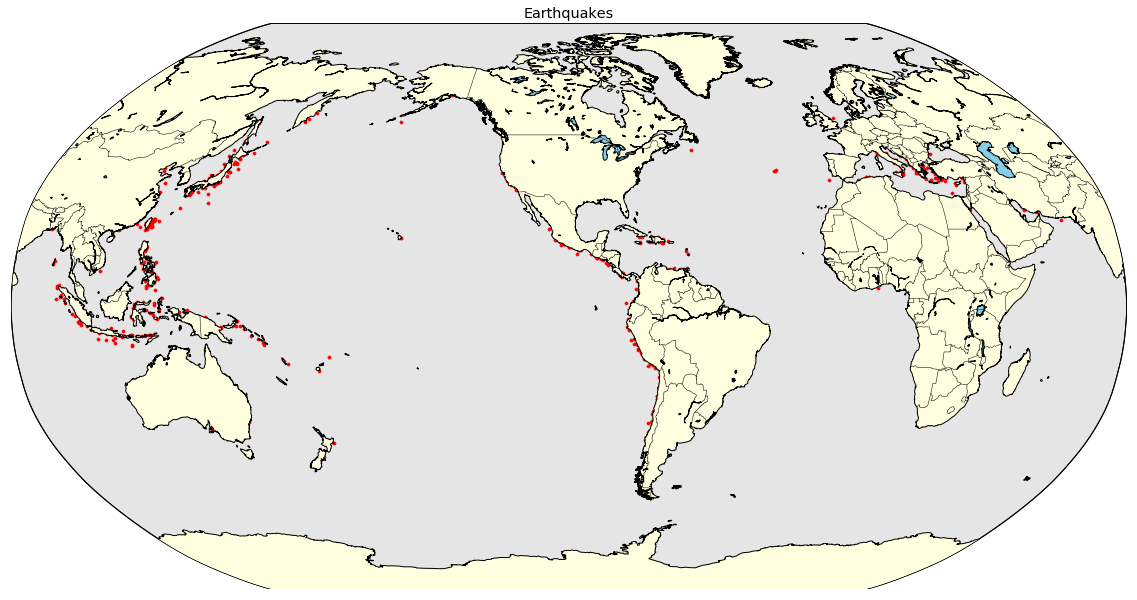

In [64]:

m = Basemap(projection='robin',lat_0=45,lon_0=-100,resolution='l')
x,y = m([longs for longs in df["Long"]],
         [lats for lats in df["Lat"]])
fig = plt.figure(figsize=(20,20))
plt.title("Earthquakes")
m.scatter(x,y, s = 10, c = "red")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightyellow',lake_color='skyblue')

plt.show()


In [65]:
minimum = df["Magnitude"].min()
maximum = df["Magnitude"].max()
average = df["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)


Minimum: 2.0
Maximum: 9.5
Mean 6.397087378640776


C:\Users\Suhasini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Suhasini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


,Range of Magnitude,Frequency,Percentage
0,2.5-3.2,6.0,0.4478
1,3.2-3.9,6.0,0.4478
2,3.9-4.6,22.0,1.6418
3,4.6-5.3,100.0,7.4627
4,5.3-6.0,298.0,22.2388
5,6.0-6.7,337.0,25.1493
6,6.7-7.4,359.0,26.7910
7,7.4-8.1,167.0,12.4627
8,8.1-8.8,34.0,2.5373
9,8.8-9.5,7.0,0.5224


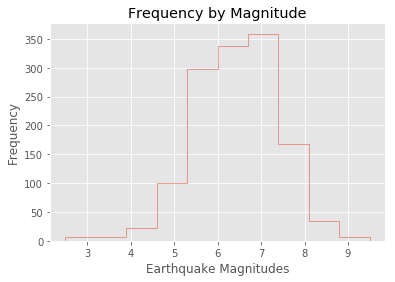

In [66]:
total = len(df)
n, bins, patch = plt.hist(df["Magnitude"], histtype = 'step', range=(2.5,9.5), bins = 10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Frequency")
plt.title("Frequency by Magnitude")
histo = pd.DataFrame()
for i in range(0, len(n)):
    mag = str(bins[i])+ "-"+str(bins[i+1])
    freq = n[i]
    percentage = round((n[i]/total) * 100, 4)
    histo = histo.append(pd.Series([mag, freq, percentage]), ignore_index=True)
    
histo.columns = ['Range of Magnitude', 'Frequency', 'Percentage']
histo

It seems that apprx. 45% of earthquakes had a magnitude between 5.0 to 8.0 whereas less that 4% scores between 8.0 and 9.5 on the Richter scale.

An interesting patterns also occurs when we plot magnitudes vs frequency on a log scale.

C:\Users\Suhasini\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


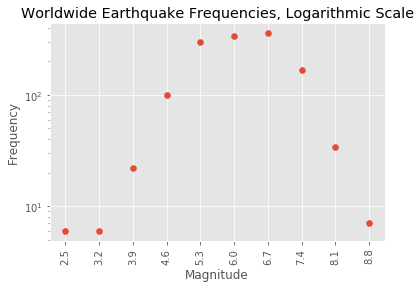

In [67]:
fig, ax = plt.subplots()
#ax.plot(histo.index, fit[0] * histo.index + fit[1], color='red')
ax.scatter(histo.index, histo['Frequency'])
plt.xticks(histo.index, bins, rotation='vertical')
plt.yscale('log')

plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Worldwide Earthquake Frequencies, Logarithmic Scale")
fig.show()


 This pattern is known as a power-law distribution: it turns out that for every increase of one point in magnitude, an earthquake becomes about ten times less frequent. So, for example, magnitude 6.5 earthquakes occur ten times more frequently than magnitude 7's, and one hundred times more often than magnitude 8's.

We can use this to relatively calculate the probability that an earthquake will hit a particular region, although it is impossible to know exactly when. For example, if we know that there were 15 earthquakes between 5.0 and 5.9 in a particular region in a period of 70 years, that works to about one earthquake in three years. Following this distribution above, we can "predict" that an earthquake measuring between 6.0 and 6.9 should occur about once every thirty years in this region.

In [68]:
gdf.info()
#del gdf['year']

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 15 columns):
Origin (UTC)           1340 non-null object
Country                1340 non-null object
Lat                    1325 non-null float64
Long                   1325 non-null float64
Depth (km)             1249 non-null float64
Magnitude              1339 non-null float64
Secondary Effects      373 non-null object
PDE Shaking Deaths     739 non-null float64
PDE Total Deaths       750 non-null float64
Utsu Total Deaths      1027 non-null float64
EM-DAT Total Deaths    560 non-null float64
Other Source Deaths    37 non-null float64
deaths                 1274 non-null float64
year                   1340 non-null int64
geometry               1340 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 157.1+ KB


In [69]:
#correlation btw depth and magnitude of earthquake
shallow = len(df[df['Depth (km)'] < 70])#18660
print(shallow)
intermediate = len(df[(df['Depth (km)'] > 70) & (df['Depth (km)'] < 300)]) ##3390
print(intermediate)
deep = len(df[df['Depth (km)'] > 300]) #1326
print(deep)
print(total)
print(str(round(shallow/float(total) * 100, 2)) + " % of earthquakes are shallow.") 
print(str(round(intermediate/float(total) * 100, 2)) + " % of earthquakes are intermediate.")
print(str(round(deep/float(total) * 100, 2)) + " % of earthquakes are deep.")

1158
83
5
1340
86.42 % of earthquakes are shallow.
6.19 % of earthquakes are intermediate.
0.37 % of earthquakes are deep.


In [70]:
deep_df = df[df['Depth (km)'] >300]
print(deep_df)

          Origin (UTC)      Country     Lat     Long  Depth (km)  Magnitude  \
501   1970-07-31 17:08     Colombia  -1.486  -72.563       644.6        8.0   
738   1984-03-06 02:17        Japan  29.372  138.871       459.1        7.4   
953   1993-10-11 15:54        Japan  32.030  137.926       351.0        6.9   
970   1994-06-09 00:33      Bolivia -13.860  -67.512       631.0        8.2   
1242  2005-02-05 12:23  Philippines   5.321  123.338       522.1        7.1   

     Secondary Effects  PDE Shaking Deaths  PDE Total Deaths  \
501                NaN                 1.0               1.0   
738                NaN                 0.0               1.0   
953                NaN                 0.0               1.0   
970                  L                 1.0               5.0   
1242               NaN                 2.0               2.0   

      Utsu Total Deaths  EM-DAT Total Deaths  Other Source Deaths  deaths  \
501                 1.0                  NaN                  N

C:\Users\Suhasini\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Suhasini\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


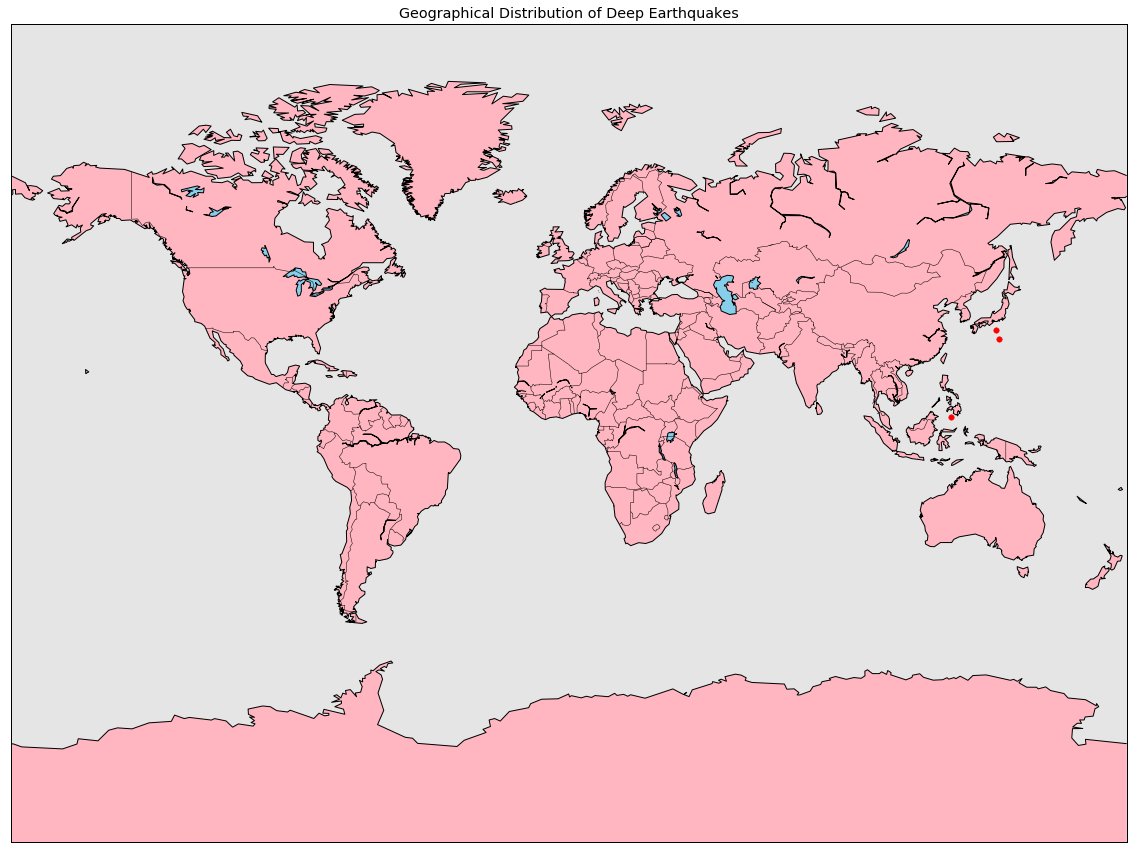

In [71]:
# deep earthquakes distribution
m = Basemap(projection="mill")
x,y = m([longs for longs in deep_df["Long"]],
         [lats for lats in deep_df["Lat"]])
fig = plt.figure(figsize=(20,20))
plt.title("Geographical Distribution of Deep Earthquakes")
m.scatter(x,y,s= 30,c = "red")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightpink',lake_color='skyblue')

plt.show()


C:\Users\Suhasini\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Suhasini\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


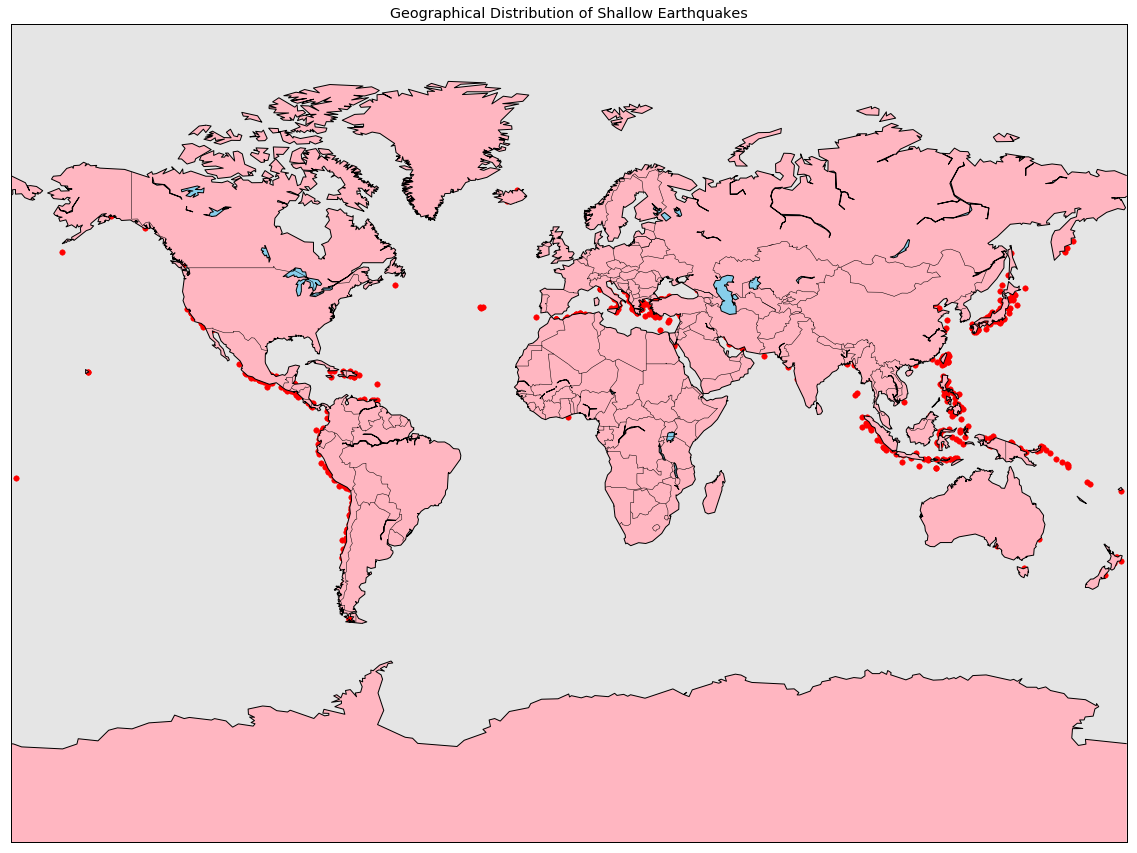

In [72]:
#shallow earthquakes distribution
shallow_df = df[df['Depth (km)'] < 70]
m = Basemap(projection="mill")
x,y = m([longs for longs in shallow_df["Long"]],
         [lats for lats in shallow_df["Lat"]])
fig = plt.figure(figsize=(20,20))
plt.title("Geographical Distribution of Shallow Earthquakes")
m.scatter(x,y,s= 30,c = "red")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightpink',lake_color='skyblue')

plt.show()


In [73]:
freqbyyear = df.groupby('year').size()
print(freqbyyear)

year
1900     3
1901     4
1902     8
1903     5
1904     4
1905     5
1906     6
1907     5
1908     2
1909    11
1910     4
1911     5
1912     5
1913     5
1914     7
1915     5
1916     2
1917     6
1918     5
1919     1
1920     6
1921     2
1922     6
1923     9
1924     6
1925     5
1926     5
1927     6
1928     9
1929     8
        ..
1982    13
1983    27
1984    18
1985    21
1986    19
1987    25
1988    16
1989    26
1990    30
1991    25
1992    21
1993    23
1994    22
1995    26
1996    12
1997    22
1998    25
1999    32
2000    27
2001    18
2002    32
2003    33
2004    32
2005    24
2006    18
2007    21
2008    19
2009     7
2010     5
2011     7
Length: 112, dtype: int64


In [74]:
df["Origin (UTC)"] = pd.to_datetime(df["Origin (UTC)"])

df["Month"] = df['Origin (UTC)'].dt.month
df["Year"] = df['Origin (UTC)'].dt.year

In [75]:

gdf

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths,year,geometry,Month,Year
0,1900-05-11 17:23:00,Japan,38.7000,141.1000,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,POINT (141.1 38.7),5,1900
1,1900-07-12 06:25:00,Turkey,40.3000,43.1000,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,1900,POINT (43.1 40.3),7,1900
2,1900-10-29 09:11:00,Venezuela,11.0000,-66.0000,0.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,POINT (-66 11),10,1900
3,1901-02-15 00:00:00,China,26.0000,100.1000,0.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,POINT (100.1 26),2,1901
4,1901-03-31 07:11:00,Bulgaria,43.4000,28.7000,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1901,POINT (28.7 43.4),3,1901
5,1901-08-09 09:23:00,Japan,40.5000,142.5000,35.0,7.2,T,NaN,NaN,NaN,NaN,NaN,NaN,1901,POINT (142.5 40.5),8,1901
6,1901-11-15 20:15:00,New Zealand,-43.0000,173.0000,0.0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1901,POINT (173 -43),11,1901
7,1902-01-30 14:01:00,Japan,40.5000,141.3000,35.0,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1902,POINT (141.3 40.5),1,1902
8,1902-02-13 09:39:00,Azerbaijan,40.7000,48.6000,15.0,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0,1902,POINT (48.6 40.7),2,1902
9,1902-03-09 07:46:00,Turkey,40.7000,33.6000,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1902,POINT (33.6 40.7),3,1902


In [76]:
from ipywidgets import widgets
from IPython.display import Audio, display
w = widgets.IntSlider()
w.value


0

In [77]:
w.keys


['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [78]:
widgets.Text(value="hello")

A Jupyter Widget

In [79]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)
mylink = widgets.jslink((a, 'value'), (b, 'value'))

A Jupyter Widget

A Jupyter Widget

In [80]:
mylink.unlink()

In [81]:
display(a,b)

A Jupyter Widget

A Jupyter Widget

In [82]:
w = widgets.FloatRangeSlider(value=(2,8), min=0, max=10,orientation='vertical', continuous_update=False, description='Magnitude')
display(w)

A Jupyter Widget

In [83]:
df_c = df.groupby(['Country']).count()
df_c

,Origin (UTC),Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths,year,geometry,Month,Year
Country,,,,,,,,,,,,,,,,
,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Afghanistan,30,30,30,30,30,12,26,26,23,19,0,29,30,30,30,30
Albania,7,7,7,7,7,0,1,1,7,2,0,7,7,7,7,7
Algeria,21,21,21,20,21,2,15,15,14,10,0,19,21,21,21,21
Argentina,11,11,11,11,11,1,4,4,10,2,0,11,11,11,11,11
Armenia,2,2,2,2,2,0,1,1,2,1,0,2,2,2,2,2
Australia,3,3,3,3,3,0,2,2,2,0,0,3,3,3,3,3
Azerbaijan,5,5,5,5,5,0,2,2,2,3,0,4,5,5,5,5
Bangladesh,7,7,7,7,7,1,4,4,5,4,0,5,7,7,7,7


In [84]:
a=gpd.read_file('data/CHN_adm1.shp');
#a.plot()

In [85]:
#print(countries)

A Jupyter Widget

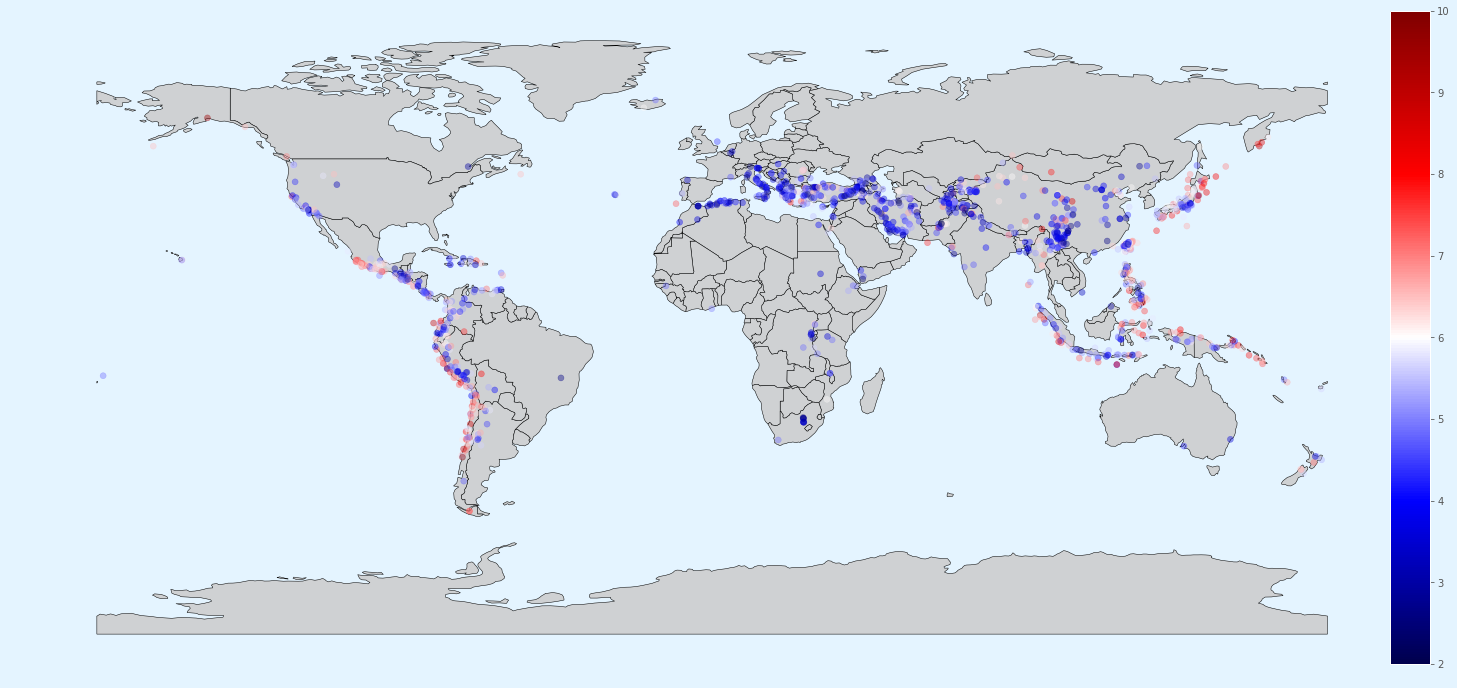

In [136]:
countries = sorted(list(set(gdf.Country)))
countries.insert(0, 'ALL')
countries.remove("")
w = widgets.FloatRangeSlider(value=(0,10),min=0,max=10, continuous_update=False, description='Magnitude')
m = widgets.Dropdown(options=countries, value='ALL', description='Country', disabled=False,)
z = widgets.HBox([w,m])
display(z)

#plotting the gdf on world map 
ax = world.plot(color='#cfd1d3', edgecolor='black', figsize=(25,55))
ax.axis('off')
gdf.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='seismic', );
fig = ax.get_figure()

from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display, clear_output
import warnings


divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.01)

sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=2.0, vmax=10.0))
sm._A = []
fig.colorbar(sm,cax=cax)
fig.patch.set_facecolor('#e4f4ff')

maximum = 10
minimum = 0
country = "ALL"
world_copy = world.copy()


def response(change):
    try:
        clear_output(wait=True)
        global country
        global maximum
        global minimum
        global world_copy
        if len(change['new']) == 2:
            maximum = change['new'][1]
            minimum = change['new'][0]
        else:
            country = change['new']
        display(z)

        if country.upper() == 'ALL':
            display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum)]
            world_copy = world
        else:
            display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum) & (gdf['Country'].str.upper() == country.upper())]
            world_copy = world[world['name'].str.upper() == country.upper()]

        #display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum)]


        ax = world_copy.plot(color='#cfd1d3', edgecolor='black',figsize=(25,55))
        ax.axis('off')
        display_df.plot(ax=ax, column='Magnitude', alpha=0.4, cmap='seismic', );
        fig = ax.get_figure()

        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='3%', pad=0.01)

        sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=2.0, vmax=10.0))
        sm._A = []
        fig.colorbar(sm,cax=cax)
        fig.patch.set_facecolor('#e4f4ff')
    except:
        print("Ain't no earthquakes of this magnitude in this country... Try again")
        warnings.filterwarnings('ignore')

    
w.observe(response, names='value')
m.observe(response, names='value')

In [ ]:
plot_year_death = df.copy() #copy the original df for this specific plot
years = sorted(list(set(plot_year_death['Year']))) #make unique list of years, ascending
plot_year_death = plot_year_death.loc[plot_year_death['Year']==years[-1]]

#plt.title('Deaths by year sized by magnitude for '+years[-1]) 
plt.xticks(rotation='vertical')
plt.scatter(plot_year_death['Country'], plot_year_death['deaths'], marker='*', alpha=0.3, s=plot_year_death['Magnitude']**2);

In [ ]:
 #years[-1] chooses most recent year for display
d = widgets.Dropdown(
    options=years,
    value=years[-1],  # using -1 defaults to the most recent year of unique years list
    description='Year',
    disabled=False,
)
display(d)

def plot_y(y_change):
    clear_output()
    year = y_change['new']
    plot_year_death = df.copy() 
    plot_year_death = plot_year_death.loc[plot_year_death['Year']==year] #new df with year selected
    display(d)
    plt.title('Deaths by country sized by magnitude for ' + str(year)) #display year selection in title
    plt.xticks(rotation='vertical')
    #plt.scatter(x=display_df['Long'], y=display_df['Lat'], s=display_df['Magnitude']*10, alpha=0.5, c='red');
    #plt.scatter(plot_year_death['Country'], plot_year_death['deaths'], marker='*', alpha=0.3, s=plot_year_death['Magnitude']**3)
    plt.hist(plot_year_death['Country'])
d.observe(plot_y, names='value')

In [ ]:
plot_year_death['Magnitude']

In [138]:
world.head(n=20)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


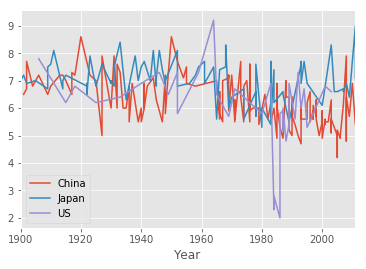

In [166]:
#plotting for china 
fig, ax = plt.subplots()
df[df['Country'] == 'China'].plot(x='Year', y='Magnitude', ax=ax,label='China');
df[df['Country']=='Japan'].plot(x='Year' , y='Magnitude',ax=ax,label='Japan');
df[df['Country']=='United States'].plot(x='Year',y='Magnitude',ax=ax,label='US');
#ax.set_title("CHINA , JAPAN ")


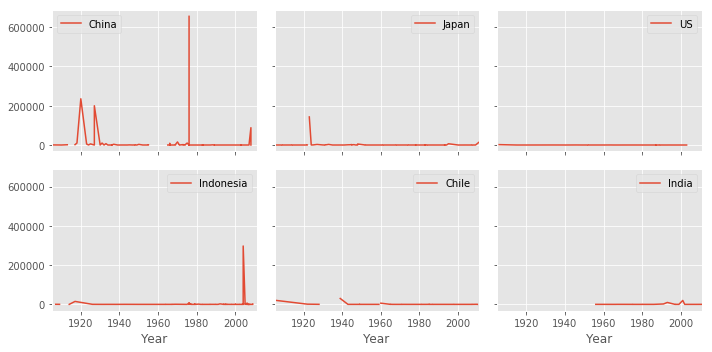

In [129]:
#fig, ax = plt.subplots()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))
df[df['Country'] == 'China'].plot(x='Year', y='deaths', ax=ax1,label='China');
df[df['Country']=='Japan'].plot(x='Year' , y='deaths',ax=ax2,label='Japan');
df[df['Country'] == 'United States'].plot(x='Year',y='deaths',ax=ax3,label='US')

df[df['Country'] == 'Indonesia'].plot(x='Year', y='deaths', ax=ax4,label='Indonesia');
df[df['Country']=='Chile'].plot(x='Year' , y='deaths',ax=ax5,label='Chile');
df[df['Country']=='India'].plot(x='Year',y='deaths',ax=ax6,label='India');

plt.tight_layout()

#ax.set_title("CHINA , JAPAN ")


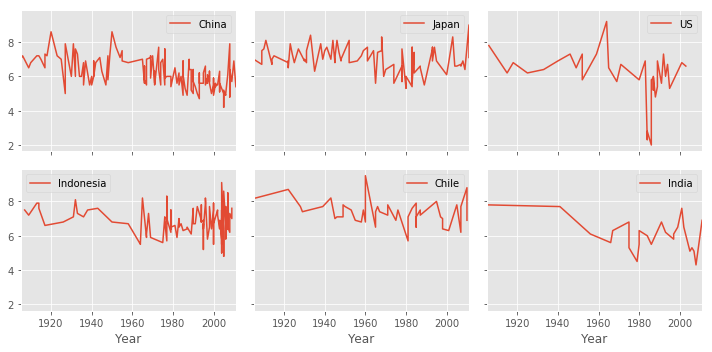

In [113]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10,5))
df[df['Country'] == 'China'].plot(x='Year', y='Magnitude', ax=ax1,label='China');
df[df['Country']=='Japan'].plot(x='Year' , y='Magnitude',ax=ax2,label='Japan');
df[df['Country'] == 'United States'].plot(x='Year',y='Magnitude',ax=ax3,label='US')

df[df['Country'] == 'Indonesia'].plot(x='Year', y='Magnitude', ax=ax4,label='Indonesia');
df[df['Country']=='Chile'].plot(x='Year' , y='Magnitude',ax=ax5,label='Chile');
df[df['Country']=='India'].plot(x='Year',y='Magnitude',ax=ax6,label='India');

plt.tight_layout()

In [115]:
len(df.groupby('Country'))

109

In [126]:
df.groupby('Country')['Year'].last().sort_values(ascending=False)

Country
Turkey                                 2011
Japan                                  2011
India                                  2011
Burma                                  2011
New Zealand                            2011
China                                  2011
Chile                                  2010
Haiti                                  2010
Indonesia                              2009
Samoa                                  2009
Italy                                  2009
Costa Rica                             2009
Democratic Republic of the Congo       2008
Rwanda                                 2008
Algeria                                2008
Kyrgyzstan                             2008
Pakistan                               2008
Colombia                               2008
Greece                                 2008
Brazil                                 2007
Martinique                             2007
Philippines                            2007
Russian Federation      

A Jupyter Widget

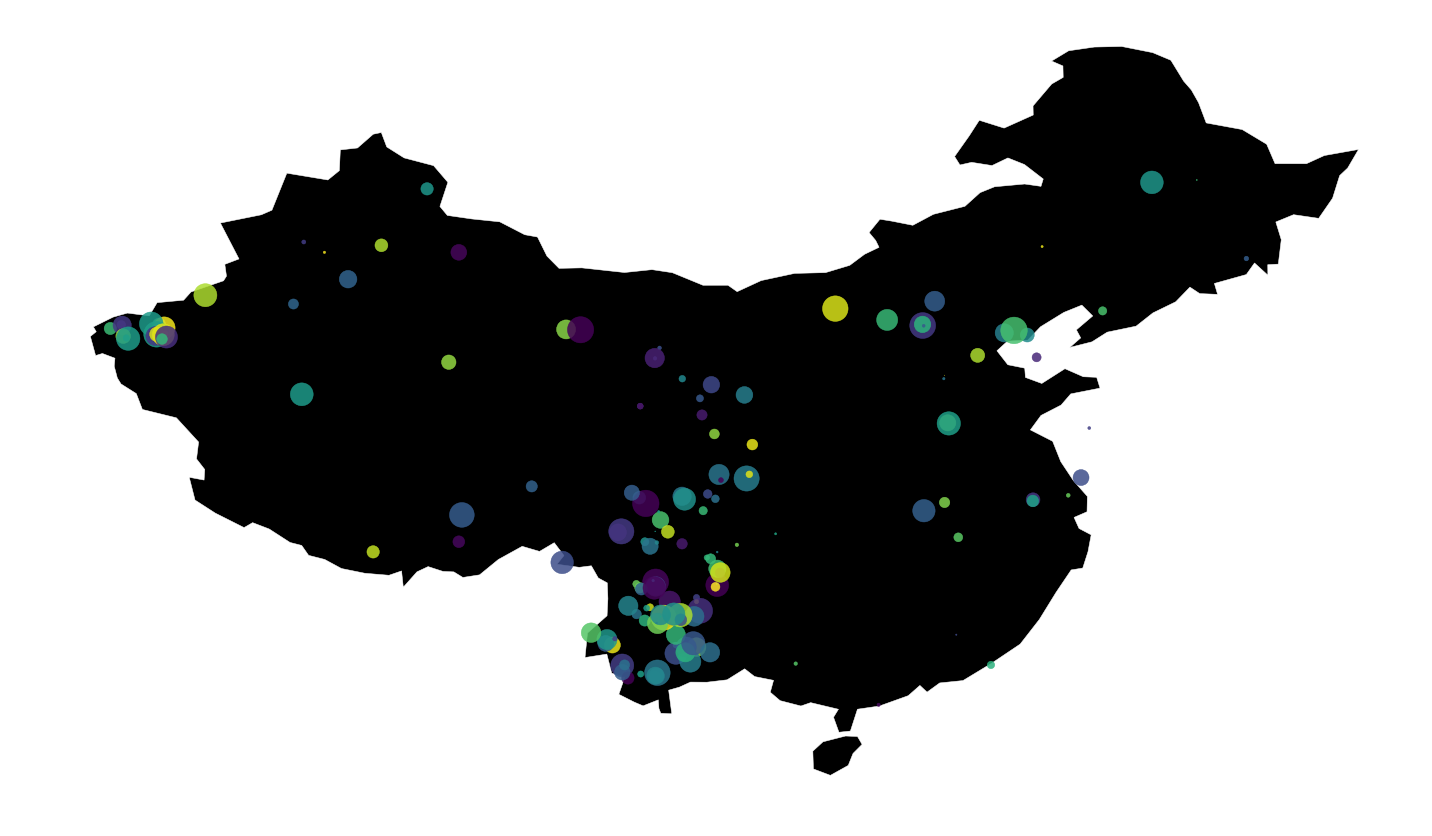

In [170]:
# scatter plot for size by magnitude
from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement
#import traitlets
import warnings

## repeated below to re-display graph ##
ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
ax.axis('off')
plt.scatter(x=gdf['Long'], y=gdf['Lat'], s=gdf['Magnitude']*10, alpha=0.3, c='red');
fig = ax.get_figure()
fig.patch.set_facecolor('#e4f4ff')
## repeated below to re-display graph ##

country = 'ALL'
minimum = 2.0
maximum = 9.5
world_copy = world.copy()

m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=gdf['Magnitude'].min(),
    max=gdf['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)

countries = sorted(list(set(gdf.Country)))
countries.insert(0, 'ALL')
countries.remove("")

d = widgets.Dropdown(
    options=countries,
    value='ALL',
    description='Country',
    disabled=False,
)
z = widgets.HBox([m,d])
display(z)

def response(change):
    try:
        clear_output(wait=True)
        global country
        global maximum
        global minimum
        global world_copy
        if len(change['new']) == 2:
            maximum = change['new'][1]
            minimum = change['new'][0]
        else:
            country = change['new']
        display(z)
        if country.upper() == 'ALL':
            display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum)]
            world_copy = world
        else:
            display_df =gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum) & (gdf['Country'].str.upper() == country.upper())]
            world_copy = world[world['name'].str.upper() == country.upper()]

        ax = world_copy.plot(color='black', edgecolor='white', figsize=(25,55))
        ax.axis('off')
        
       
        N = display_df.Country.count()
        x = display_df['Long']
        y = display_df['Lat']
        colors = np.random.rand(N)
        area =np.pi *(15 * np.random.rand(N)) ** 2
        #np.pi * (15 * np.random.rand(N))**2
        
        plt.scatter(x , y , s= area, c=colors,alpha=0.85);
        
        #plt.scatter(x=display_df['Long'], y=display_df['Lat'], s=display_df['Magnitude']*10, alpha=0.5, c='red');
        plt.show()
        #print(display_df)
        fig = ax.get_figure()
        fig.patch.set_facecolor('#e4f4ff')
    except:
        print("Ain't no earthquakes of this magnitude in this country... Try again")
        warnings.filterwarnings('ignore')


m.observe(response, names='value')
d.observe(response, names='value')

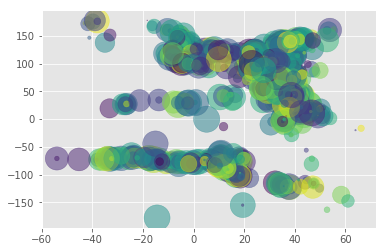

In [144]:
import numpy as np
import matplotlib.pyplot as plt


N = 1340
x = df['Lat']
y = df['Long']
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [163]:
d=df.groupby('year').last()
print(d)

            Origin (UTC)                    Country     Lat     Long  \
year                                                                   
1900 1900-10-29 09:11:00                  Venezuela  11.000  -66.000   
1901 1901-11-15 20:15:00                New Zealand -43.000  173.000   
1902 1902-12-16 05:07:00                 Uzbekistan  40.800   72.300   
1903 1903-09-25 01:20:00                       Iran  35.200   58.200   
1904 1904-11-05 20:25:00                     Taiwan  23.500  120.300   
1905 1905-11-08 22:06:00                     Greece  40.000   24.000   
1906 1906-12-22 18:21:00                      China  43.500   85.000   
1907 1907-10-21 04:23:00                 Tajikistan  38.000   69.000   
1908 1908-12-28 04:20:00                      Italy  38.000   15.500   
1909 1909-11-10 06:13:00                      Japan  32.300  131.100   
1910 1910-06-24 13:27:00                    Algeria  36.100    3.400   
1911 1911-06-15 14:26:00                      Japan  28.000  130

In [168]:
countries = sorted(list(set(gdf.Country)))
countries.insert(0, 'ALL')
countries.remove("")

w = widgets.FloatRangeSlider(value=(0,10),min=0,max=10, continuous_update=False, description='Magnitude')
m = widgets.Dropdown(options=countries, value='ALL', description='Country', disabled=False,)
mt = widgets.RadioButtons(options=['scatter','line','Basemap','hist'],description='Diff Plots..',disabled=False)
z = widgets.HBox([w,m,mt])
display(z)

A Jupyter Widget

A Jupyter Widget

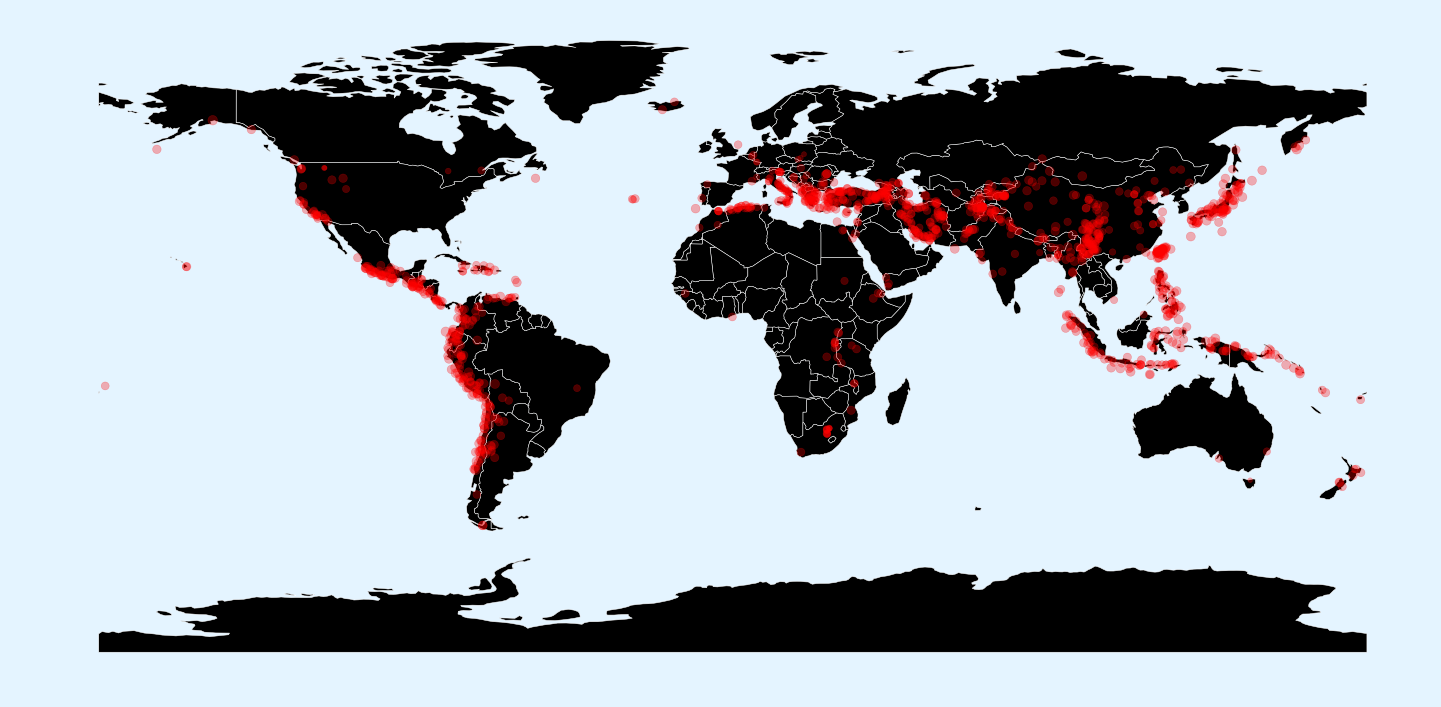

In [172]:
from mpl_toolkits.axes_grid1 import make_axes_locatable #imported for colorbar placement
#import traitlets
import warnings

## repeated below to re-display graph ##
ax = world.plot(color='black', edgecolor='white', figsize=(25,55))
ax.axis('off')
plt.scatter(x=gdf['Long'], y=gdf['Lat'], s=gdf['Magnitude']*10, alpha=0.3, c='red');
fig = ax.get_figure()
fig.patch.set_facecolor('#e4f4ff')
## repeated below to re-display graph ##

country = 'ALL'
minimum = 2.0
maximum = 9.5
world_copy = world.copy()

m = widgets.FloatRangeSlider(
    value=(0, 15),
    min=gdf['Magnitude'].min(),
    max=gdf['Magnitude'].max(),
    description='Magnitude',
    continuous_update=False,
)

countries = sorted(list(set(gdf.Country)))
countries.insert(0, 'ALL')
countries.remove("")

d = widgets.Dropdown(
    options=countries,
    value='ALL',
    description='Country',
    disabled=False,
)

mt= mt = widgets.RadioButtons(options=['scatter','line','Basemap','hist'],description='Diff Plots..', indicatoron = 0,disabled=False)
z = widgets.HBox([m,d,mt])
display(z)

def response(change):
    try:
        clear_output(wait=True)
        global country
        global maximum
        global minimum
        global world_copy
        if len(change['new']) == 2:
            maximum = change['new'][1]
            minimum = change['new'][0]
        else:
            country = change['new']
        display(z)
        if country.upper() == 'ALL':
            display_df = gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum)]
            world_copy = world
        else:
            display_df =gdf[(gdf["Magnitude"] >= minimum) & (gdf['Magnitude'] <= maximum) & (gdf['Country'].str.upper() == country.upper())]
            world_copy = world[world['name'].str.upper() == country.upper()]

        ax = world_copy.plot(color='black', edgecolor='white', figsize=(25,55))
        ax.axis('off')
        
       
        N = display_df.Country.count()
        x = display_df['Long']
        y = display_df['Lat']
        colors = np.random.rand(N)
        area =np.pi *(15 * np.random.rand(N)) ** 2
        #np.pi * (15 * np.random.rand(N))**2
        
        plt.scatter(x , y , s= area, c=colors,alpha=0.85);
        
        #plt.scatter(x=display_df['Long'], y=display_df['Lat'], s=display_df['Magnitude']*10, alpha=0.5, c='red');
        plt.show()
        #print(display_df)
        fig = ax.get_figure()
        fig.patch.set_facecolor('#e4f4ff')
    except:
        print("Ain't no earthquakes of this magnitude in this country... Try again")
        warnings.filterwarnings('ignore')


m.observe(response, names='value')
d.observe(response, names='value')

In [176]:
trs = table.find_all('tr')
print(trs)
'''header = trs.pop(0)
ths = header.find_all('th')

headers = [x.text for x in ths]
data = []

for row in trs:
    tds = row.find_all('td')
    data.append([f.text for f in tds])
    
df1 = pd.DataFrame.from_records(data, columns=headers)'''

[<tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths</th>
</tr>, <tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a class="mw-redirect" href="/wiki/Seismic_scale#Mjma" title="Seismic scale"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>, <tr>
<td>1900-

"header = trs.pop(0)\nths = header.find_all('th')\n\nheaders = [x.text for x in ths]\ndata = []\n\nfor row in trs:\n    tds = row.find_all('td')\n    data.append([f.text for f in tds])\n    \ndf1 = pd.DataFrame.from_records(data, columns=headers)"

In [174]:
print(df1)

          Origin (UTC) Present-day country and link to Wikipedia article  \
0     1900-05-11 17:23                                             Japan   
1     1900-07-12 06:25                                            Turkey   
2     1900-10-29 09:11                                         Venezuela   
3     1901-02-15 00:00                                             China   
4     1901-03-31 07:11                                          Bulgaria   
5     1901-08-09 09:23                                             Japan   
6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
7     1902-01-30 14:01                                             Japan   
8     1902-02-13 09:39                                        Azerbaijan   
9     1902-03-09 07:46                                            Turkey   
10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
11    1902-07-03 15:36                                             China   
12    1902-0